Welcome to your final project! For this project, you will be given a dataset and tasked with doing a datascience project with it. To help you out, you'll be provided a notebook to fill out. Copy this notebook, fill it out, and turn it in! Make sure your writing is clear, precise and professional--you will be graded on writing quality. Make sure your visualizations are also well labeled and put together. Submit a notebook and a PDF.

# The Dataset
`
Your task here will be predicting studnet GPAs. 

Download the following dataset: https://drive.google.com/file/d/14jkgeXF1_0U446EWP1Ee8L8UoJM53TYg/view?usp=sharing

It contains:

*   id--a student's id
*   lat--student's home latittude
*   lon--student's home longitude
*   avg_hours_studided--how many hours this student studied every week on average this semester
*   parents_income--the student's parent's income in dollars.
*   major--the student's major
*   tutoring--whether or not the student received tutoring this semester
*   semester--what semester it is
*   credits--how many credits the student took this semester
*   student_age--how old the student is
*   student_year--what year of college the student is
*   year--what year it is

Your task will be writing an algorithm that, given a set of student information, will predict the student's GPA. As you go, you'll need to fill in each section. For each section, provide code that does what the section asks, as well as a thoughtful, well written explanation of your observations.



# Introduction
In this project we aim to demonstrate our learning and undersetanding of our CMSC320 Class. Our task in this project is to correctly predict a student GPAs.
We are given multiple varaiables such as id,latitude,longitude,credits,average hours studied to help us create the precise alogirthm to correctly predict it.
The difficulties in this project would be limited features as we are not given the characteristics of the student as to how they study as some may tend to get off track easily. The dataset also contains outliers and missing variables.

### Libraries Used

* Pandas: Used to display and organize data in dataframes
* Numpy: Used to support our data
* scikit-learn: Used to create predictive model to correctly predict a student GPAs.
* Seaborn: Used to create plots
* matplotlib: Used to format plots
* scipy: Used to perform hypothesis testing

In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

# Data Exploration

For this section, explore each variable. For each column, provide information on the min, max, a histogram, and brief speculation about whether or not it will be useful going forward. This is most of where your visualizations should go. You should also answer the following questions. Note that some of these require hypothesis tests.

* Does this school have transfer students?
* What is the median length of attendence at this university?
* Do you think this university has any one credit classes?
* Is grade inflation a problem at this university?
* In what area do you think the Univesrity might be located?
* Does tutoring make a stastically significant difference in grade?
* How often do students switch majors?
* Do different majors have different GPA distributions?

## About the dataset
The dataset we will be using contains entries from 1000000 semesters. The dataset was provided by our professor.

The dataset contains id, latitute, longitude, gpa, average hours studient, parents income, major, tutoring, semester, year, credits taken, student age and student year.

I downloaded the dataset as a csv file and loaded in the dataset.

In [554]:
df = pd.read_csv('my_data.csv', nrows= 10000)
df.head()

,Unnamed: 0,id,lat,lon,gpa,avg_hours_studied,parents_income,major,tutoring,semester,year,credits,student_age,student_year
0,0,13251,38.878529,-76.776049,3.64,5,68628.72693,Math,No,Fall,2007,15,26,Freshman
1,1,13251,38.878529,-76.776049,3.65,5,68628.72693,Math,No,Spring,2008,15,27,Freshman
2,2,13251,38.878529,-76.776049,4.00,5,68628.72693,Math,No,Fall,2008,9,27,Sophmore
3,3,13251,38.878529,-76.776049,4.00,4,68628.72693,Math,No,Spring,2009,9,28,Sophmore
4,4,13251,38.878529,-76.776049,3.30,4,68628.72693,Math,No,Fall,2009,18,28,Junior


In [555]:
df.columns

Index(['Unnamed: 0', 'id', 'lat', 'lon', 'gpa', 'avg_hours_studied',
       'parents_income', 'major', 'tutoring', 'semester', 'year', 'credits',
       'student_age', 'student_year'],
      dtype='object')

In [556]:
df.shape

(10000, 14)

After initial examination, it seems that there needs to be some binning done to this data. The latitude and longitude have are in 6 decimal points. The income is in 5 decimal points as well. I would want to bin those columns so the numerical values are transoformed into catergical.

In this section we are going to explore each variable.

### Latitudes and Longitudes

Latitudes and longitudes will be essential for the alogirthm. As people who live on campus might find it easier to study or get distracted from parties, events etc. They are currently in numerical which I can will change into ordinal data. To change it I will will bin the datas. I will start the bin from the min and end at the max.

In [557]:
df["lat"].min()

32.16091059864896

In [558]:
df["lat"].max()

39.90721968882051

In [559]:
df["lon"].min()

-94.50942993681656

In [560]:
df["lon"].max()

-76.05007318312424

In [561]:
lat_bins = [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
lon_bins = [-95, -90, -85, -80, -75]
df['lat_bin'] = pd.cut(df['lat'], bins=lat_bins)
df['lon_bin'] = pd.cut(df['lon'], bins=lon_bins)

### GPA 

This is my target variable. This model is trained to predict a student's gpa. 

In [562]:
df["gpa"].min()

0.23

In [563]:
df["gpa"].max()

4.1

In [564]:
df[df["gpa"] > 4.0].count()

Unnamed: 0           860
id                   860
lat                  860
lon                  860
gpa                  860
avg_hours_studied    860
parents_income       860
major                860
tutoring             822
semester             860
year                 860
credits              860
student_age          860
student_year         860
lat_bin              860
lon_bin              860
dtype: int64

<AxesSubplot:>

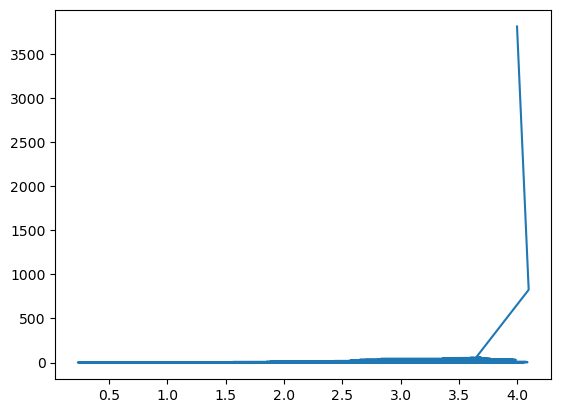

In [565]:
df['gpa'].value_counts().plot(kind='line')

The max for the gpa is 4.1. The scale for University GPA's are from 0 to 4. So in this case, it is an outlier. I will be deleting the rows which consists of 4.1 GPAs.

### Average Hours Studied

In [566]:
df["avg_hours_studied"].min()

0

In [567]:
df["avg_hours_studied"].max()

10

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa42139d0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa42139d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa3d2addd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa42139dbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa42139deb0>],
 'means': []}

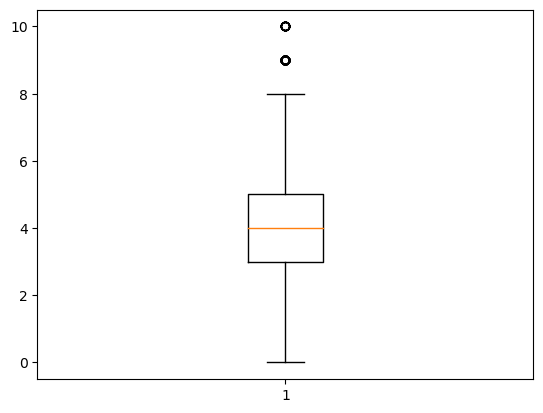

In [568]:
plt.boxplot(df['avg_hours_studied'])

The boxplot shows that there are outliers. Lets say the a student studies 5 hours per day. 5 * 75 = 375. I will consider anything that is above 500 to be an outlier.

In [569]:
df[df['avg_hours_studied'] > 500].count()

Unnamed: 0           0
id                   0
lat                  0
lon                  0
gpa                  0
avg_hours_studied    0
parents_income       0
major                0
tutoring             0
semester             0
year                 0
credits              0
student_age          0
student_year         0
lat_bin              0
lon_bin              0
dtype: int64

### Parents Income

In [570]:
df['parents_income'].min()

28518.329794788064

In [571]:
df['parents_income'].max()

175899.23293723704

<AxesSubplot:xlabel='parents_income', ylabel='Count'>

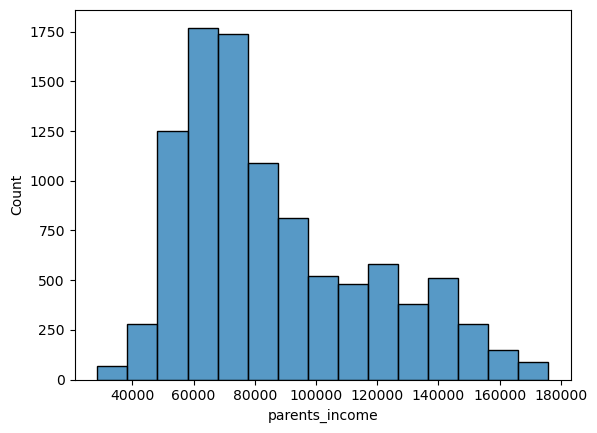

In [572]:
sns.histplot(data=df, x='parents_income', bins=15)

This is an important variable. Students may perform well if their parents are doing well as there is no pressure about earning money or vice versa. There is no outliers for this variable.

### Major

<AxesSubplot:xlabel='major', ylabel='Count'>

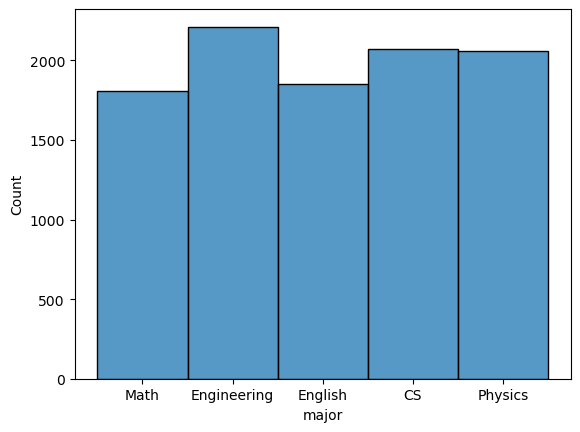

In [573]:
sns.histplot(data=df, x='major',bins = 10)

The dataset shows that there are 5 majors. Physics is the most common major and English is the least. But I would say that they are evenly disributed.

### Tutoring

<AxesSubplot:xlabel='tutoring', ylabel='Count'>

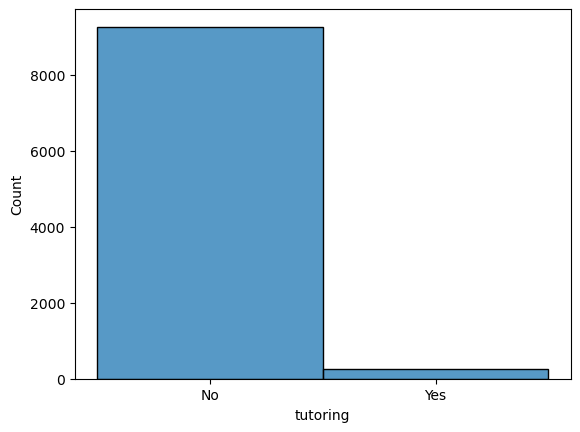

In [574]:
sns.histplot(data=df, x='tutoring', bins = 10)

This column will be useful. People who use tutoring services may understand the course materials better. As they are getting help outside of class.

### Credits

In [575]:
df['credits'].min()

9

In [576]:
df['credits'].max()

18

<AxesSubplot:xlabel='credits', ylabel='Count'>

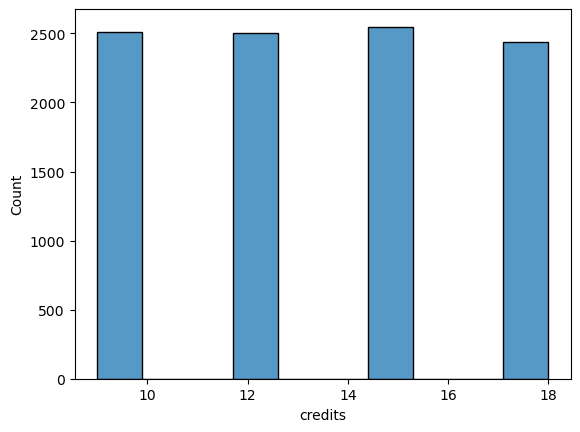

In [577]:
sns.histplot(data=df, x='credits',bins = 10)

Credits will also be very useful. Student with less credits do not have to spend time on multiple subjects on once. Rather they can afford to spend all of their time into a few subjects. The min for this column is 9 and the max for this column is 18.

### Student Age

In [578]:
df['student_age'].min()

17

In [579]:
df['student_age'].max()

33

<AxesSubplot:xlabel='student_age', ylabel='Count'>

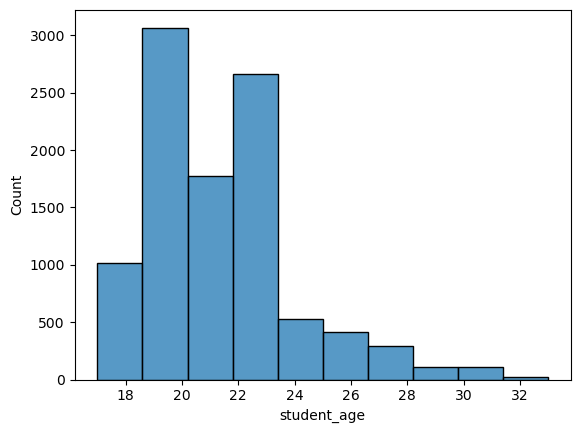

In [580]:
sns.histplot(data=df, x='student_age', bins = 10)

Student Age is useful as well. This is because younger students may slack a little bit and older people may try harder. This is becaues they cannot afford to waste any time. There seems to be no outliers in this column. The min is 17 and the max is 33.

Does this school have transfer students?
To figure this question out, we need to first find the number of students who started as a freshman.

In [581]:
freshman_students = df[(df["student_year"] == "Freshman") & (df["semester"] == "Spring")]
freshman_unique_ids = freshman_students["id"].unique()
freshman_unique_ids.shape

(1000,)

In [582]:
senior_students = df[(df["student_year"] == "Senior") & (df["semester"] == "Fall")]
senior_unique_ids = senior_students["id"].unique()
senior_unique_ids.shape

(1000,)

There are a total of 100000 unique ids of students who started has a freshman. But there is the same  amount of ids with the school year senior. So this tell us that there is no transfers in this university.

What is the median length of attendence at this university?

In [583]:
Total_year_of_one_student = df.groupby("id")["year"].apply(lambda x: x.max() - x.min()).median()
print(Total_year_of_one_student)

5.0


After calculation, the median lenght of attendence at this university is 5 years.

Do you think this university has any one credit classes?

Since we are not given the credits of each class. We can also assume that the university has any one credit classes. If the university does offer one credit classes then the total credits take will be odd. If a person take 9 credits, then he/she might have take either 3 3-credit classes or 2 4-credit classes and 1 1-credit class.

In [584]:
odd_credit_semesters = df[(df["credits"] % 2  == 1)]
odd_credit_semesters.count()

Unnamed: 0           5060
id                   5060
lat                  5060
lon                  5060
gpa                  5060
avg_hours_studied    5060
parents_income       5060
major                5060
tutoring             4816
semester             5060
year                 5060
credits              5060
student_age          5060
student_year         5060
lat_bin              5060
lon_bin              5060
dtype: int64

Since there is semesters with odd credits. I believe that the university does offer one credit classes.

Is grade inflation a problem at this university?
To tackle this problem, first I am going to get the average mean of each year then use a line plot for it. The reason I chose line plot was because it is good for visualizing data over time showing the change over the years.

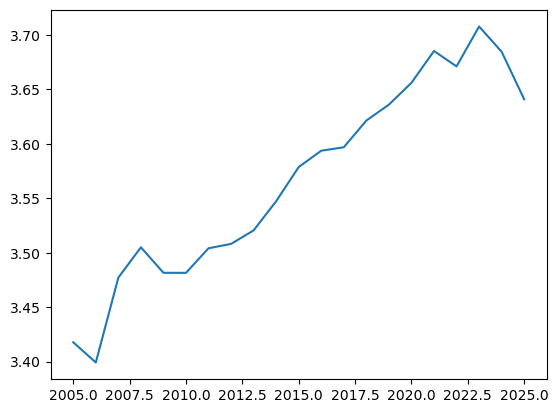

In [585]:
mean_of_years = df.groupby("year")["gpa"].mean()
plt.plot(mean_of_years.index, mean_of_years.values)

From the graph, we tell that the graph was has been increasing. So yes, Grade inflation is a problem at this university.

In what area do you think the University might be located?

In [586]:
df['lat_bin'].value_counts()

(39, 40]    5160
(38, 39]    2350
(32, 33]    2120
(33, 34]     370
(31, 32]       0
(34, 35]       0
(35, 36]       0
(36, 37]       0
(37, 38]       0
(40, 41]       0
Name: lat_bin, dtype: int64

In [587]:
df['lon_bin'].value_counts()

(-80, -75]    5010
(-95, -90]    2500
(-90, -85]    2490
(-85, -80]       0
Name: lon_bin, dtype: int64

This university is in the area of 39 to 40 latitude and -80 to -75 longitude.

To find out if there is a significant difference in grade, I will be using hypothesis tesing. I will be using T testing as it is used to measure the difference between exactly two means i.e. one who goes to tutoring and one who doesn't. The Null Hypothesis for this test will be Tutoring does not have a significant effect on grade. To reject the hypothesis I will use an alpha value of 5% or 0.05. I will not be using the "missing values".

In [588]:
Tutoring = df[df["tutoring"] == "Yes"]
No_Tutoring = df[df["tutoring"] == "No"]
t_stat, p_value = ttest_ind(Tutoring["gpa"], No_Tutoring["gpa"])
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -4.7838421382092795
P-Value:  1.7455985733715166e-06


Since the P-Value is less then the alpha value I chose, I can reject the null hypothesis and say that Tutoring does have a significant effect on grade.

How often do students switch majors?

Do different majors have different GPA distributions?

<AxesSubplot:xlabel='major', ylabel='gpa'>

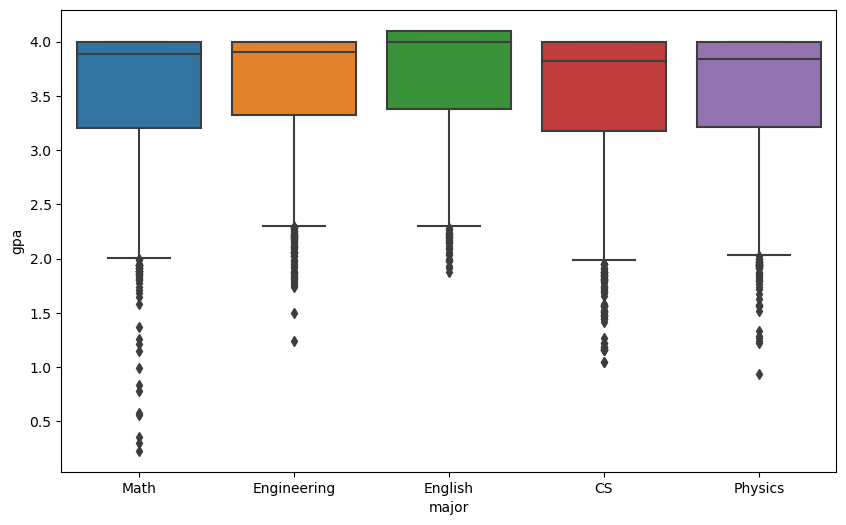

In [589]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='major', y='gpa')

Looking at the box plot English majors have a slight better GPA than the other majors. But just to be sure, I will be using ANOVA testing as we are measuring the means of 5 groups.
The Null Hypothesis for this test will be different majors do not have a different GPA distributions. To reject the hypothesis I will use an alpha value of 5% or 0.05.

In [590]:
ENG = df[df['major'] == 'English']
MATH = df[df['major'] == 'Math']
CS = df[df['major'] == 'CS']
PHY = df[df['major'] == 'Physics']
ENGR = df[df['major'] == 'Engineering']
fvalue, pvalue = stats.f_oneway(ENG['gpa'], MATH['gpa'], CS['gpa'], PHY['gpa'], ENGR['gpa'])
print(fvalue, pvalue)

30.270492088076885 4.460546926689976e-25


Since the p-value was less than the alpha value, I can reject the Null hypothesis and say that different majors do have a different GPA distributions.

# Data Cleaning
Describe how you will deal with outliers and missing data if you found any. Explain why you picked whichever method you did. One-hot encode any variables you need to encode. Figure out how you plan on handling the latitude and longitude, and write code to handle it (ignoring it is not an option).

There is missing values in tutoring. Since it is categorical data, I will replace the missing data with "Missing".

In [591]:
df.isnull().sum()

Unnamed: 0             0
id                     0
lat                    0
lon                    0
gpa                    0
avg_hours_studied      0
parents_income         0
major                  0
tutoring             479
semester               0
year                   0
credits                0
student_age            0
student_year           0
lat_bin                0
lon_bin                0
dtype: int64

In [592]:
df.tutoring.fillna('Missing',inplace=True)
df['tutoring'].value_counts()

No         9266
Missing     479
Yes         255
Name: tutoring, dtype: int64

Since the distribution of lat is smaller. I will bin them in increment of ones. Whereas for lon I will increment it by 5.

As the box plot showed outliers for avg_hours_studied. To remove outliers for avg_hours_studied, I will be using the Z-score as we learned from class.

In [593]:
df_filtered = df[np.abs(zscore(df["avg_hours_studied"])) <= 3]
df_filtered.count()

Unnamed: 0           9983
id                   9983
lat                  9983
lon                  9983
gpa                  9983
avg_hours_studied    9983
parents_income       9983
major                9983
tutoring             9983
semester             9983
year                 9983
credits              9983
student_age          9983
student_year         9983
lat_bin              9983
lon_bin              9983
dtype: int64

I will also be removing GPAs that are greater than 4.0. For this process, since we already know the scale, I will just remove the rows that are out of the scale.

In [594]:
df_filtered = df_filtered[df_filtered['gpa'] <= 4.0]

I will be one-hot encoding majors and tutoring as they are categorical variables. I will not one-hot encode semesters as there are only two semesters.

In [595]:
df_filtered = pd.get_dummies(df, columns =['major','tutoring'])
df_filtered.count()

Unnamed: 0           10000
id                   10000
lat                  10000
lon                  10000
gpa                  10000
avg_hours_studied    10000
parents_income       10000
semester             10000
year                 10000
credits              10000
student_age          10000
student_year         10000
lat_bin              10000
lon_bin              10000
major_CS             10000
major_Engineering    10000
major_English        10000
major_Math           10000
major_Physics        10000
tutoring_Missing     10000
tutoring_No          10000
tutoring_Yes         10000
dtype: int64

In [596]:
lat_lon_data = df[['lat', 'lon']]
scaler = StandardScaler()
scaler.fit(lat_lon_data)
scaled_data = scaler.transform(lat_lon_data)
df_filtered[['lat', 'lon']] = scaled_data

# Evaluation
Explain how you plan on evaluating your models. What is particularly tricky about evaluating this problem? (There are multiple gotchas with how this problem is structured--identify them!) What evaluation metric will you use?

To evaluate this model, I will split the data set into training set and testing set. The thing that is tricky about evaluating this problem is that the datas are in chronological orders. So I should maintain the order. This is because the earlier semesters may be easier than the ones in senior years. The model should be able to predict the future rather than the past as the senior year GPAs might be less than then earlier years. The evaluation metric that I will use Root Mean Squared Error. Since this is a regression model rather than a classfication one, I would need to use regression metrics. RMSE and MSE punish larger errors rather than smaller errors. The reason I chose RMSE over MSE as it is measured in the same units as the response variable. Since I have already dealt with outliers, I would not have to worry about it in RMSE. 

# Modeling
Pick out at least three different models to try. If your model has hyperparameters, pick some and justify how you picked them. Try out your models! Keep in mind this is a toy problem, so your models might not be that accurate.

First I will split the data into training and testing set

In [620]:
Features = df_filtered[['avg_hours_studied','year','credits','parents_income','student_age','major_CS','major_Engineering','major_English','major_Math','major_Physics','tutoring_Missing','tutoring_No','tutoring_Yes','lat','lon']]
target = df_filtered["gpa"]
Features_train, Features_test, target_train, target_test = train_test_split(Features, target, test_size=0.3)
modelL = LinearRegression()
modelL.fit(Features_train, target_train)
prediction = modelL.predict(Features_test)
rmse = mean_squared_error(target_test, prediction, squared=False)
print(rmse)

0.4100352927322607


In [623]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(Features_train, target_train)
dt_prediction = decision_tree.predict(Features_test)
rmse = mean_squared_error(target_test, dt_prediction, squared=False)
print(rmse)

0.39611883738763715


In [624]:
knearest = KNeighborsRegressor()
knearest.fit(Features_train, target_train)
kn_prediction = knearest.predict(Features_test)
rmse = mean_squared_error(target_test, kn_prediction, squared=False)
print(rmse)

0.2266814446163014


# Conclusion

Summarize what you did and what the results are. Do you feel your model is successful? What additional data do you feel you'd need to go forward?

Overall, I think my k-neighbors algorithm was the most successful. As it had a rmse of 0.22 compared to 0.39 and 0.41. The hardest part was the latitude and longitude. I scaled them as I was unsure on how to put the bins into the model. I believe that my model was successful. Going forward, the data I would require would be the location of the campus so I can scale it better and also a ranking on the difficulty of the semester.